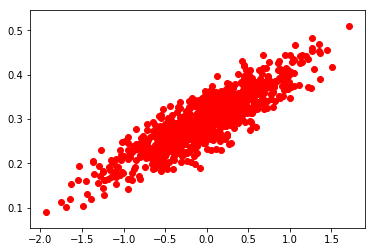

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.figure()
plt.scatter(x_data,y_data,c='r')
plt.show()

In [4]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
with tf.name_scope('weight'):
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
with tf.name_scope('bias'):
    b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算得出预估值y
with tf.name_scope('y'):
    y = W * x_data + b

# 以预估值y和实际值y_data之间的均方误差作为损失
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

# 初始化的W和b是多少
print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# 执行20次训练
for step in range(20):
    sess.run(train)
    # 输出训练好的W和b
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
writer = tf.summary.FileWriter('logs/', tf.get_default_graph())

W = [-0.62615395] b = [0.] loss = 0.2454989
W = [-0.40597785] b = [0.2826203] loss = 0.080964416
W = [-0.24810025] b = [0.28765136] loss = 0.038835805
W = [-0.1394096] b = [0.2912589] loss = 0.01886672
W = [-0.06457837] b = [0.2937425] loss = 0.0094013065
W = [-0.01305863] b = [0.29545245] loss = 0.004914668
W = [0.02241163] b = [0.29662967] loss = 0.002787986
W = [0.04683216] b = [0.29744017] loss = 0.0017799314
W = [0.06364518] b = [0.2979982] loss = 0.00130211
W = [0.0752206] b = [0.29838237] loss = 0.0010756211
W = [0.08319003] b = [0.29864687] loss = 0.0009682647
W = [0.08867682] b = [0.298829] loss = 0.0009173772
W = [0.09245436] b = [0.29895437] loss = 0.00089325645
W = [0.09505511] b = [0.29904068] loss = 0.0008818232
W = [0.09684568] b = [0.2991001] loss = 0.00087640376
W = [0.09807844] b = [0.29914102] loss = 0.0008738348
W = [0.09892718] b = [0.29916918] loss = 0.0008726171
W = [0.09951151] b = [0.29918858] loss = 0.00087204
W = [0.09991381] b = [0.29920194] loss = 0.0008717

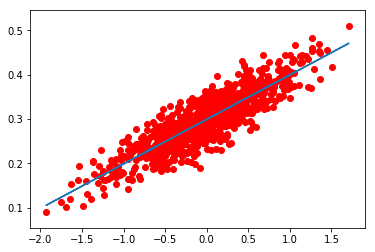

In [5]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()